<a href="https://colab.research.google.com/github/aasrod/Discrete_Variable_Prediction/blob/main/Supervised_learning_discrete_variable_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install category_encoders

In [ ]:
import pandas as pd
import numpy as np
import os
import category_encoders as ce
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
from sklearn import svm, tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import time

In [ ]:
# from google.colab import files
# files.upload()

In [ ]:
# !pip install kaggle

# os.environ['KAGGLE_USERNAME'] = "dorsaalh"
# os.environ['KAGGLE_KEY'] = "70c734c4c8f1b78b26e5c830987ee087"

# !kaggle datasets download -d matleonard/feature-engineering-data
# !unzip feature-engineering-data.zip

In [ ]:
# !mv /content/train_sample.csv /content/drive/MyDrive/DS_supervised_learning_project/part2/train_sample.csv

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DS_supervised_learning_project/part2/train_sample.csv')
data

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,89489,3,1,13,379,2017-11-06 15:13:23,NaN,0
1,204158,35,1,13,21,2017-11-06 15:41:07,2017-11-07 08:17:19,1
2,3437,6,1,13,459,2017-11-06 15:42:32,NaN,0
3,167543,3,1,13,379,2017-11-06 15:56:17,NaN,0
4,147509,3,1,13,379,2017-11-06 15:57:01,NaN,0
...,...,...,...,...,...,...,...,...
2300556,32457,2,1,19,477,2017-11-09 15:59:59,NaN,0
2300557,20266,14,1,13,446,2017-11-09 15:59:59,NaN,0
2300558,49383,12,2,17,178,2017-11-09 16:00:00,NaN,0
2300559,34894,12,1,15,145,2017-11-09 16:00:00,NaN,0


In [ ]:
data.isnull().sum()

ip                       0
app                      0
device                   0
os                       0
channel                  0
click_time               0
attributed_time    1843715
is_attributed            0
dtype: int64

In [ ]:
data.drop(columns='attributed_time', inplace = True)

In [ ]:
data[data.is_attributed == 1].shape

(456846, 7)

In [ ]:
balanced_data = data[data.is_attributed == 1].sample(456800)
balanced_data = balanced_data.append(data[data.is_attributed == 0].sample(456800))
balanced_data = shuffle(balanced_data)
balanced_data

,ip,app,device,os,channel,click_time,is_attributed
1332820,194452,2,1,16,377,2017-11-08 11:33:51,0
574222,66356,15,1,11,379,2017-11-07 11:26:13,0
398863,154023,5,1,32,113,2017-11-07 06:52:26,1
1815026,37028,8,1,25,145,2017-11-09 04:20:19,0
194303,59214,35,1,8,21,2017-11-07 01:55:30,1
...,...,...,...,...,...,...,...
2059993,114276,2,1,19,236,2017-11-09 10:08:06,0
1364737,91694,12,2,13,178,2017-11-08 12:17:51,0
1622687,331232,3,1,22,409,2017-11-08 23:30:51,0
1183068,74678,29,1,13,213,2017-11-08 07:48:15,1


In [ ]:
sb = int(0.8 * balanced_data.shape[0])
train = balanced_data.iloc[:sb]
test  = balanced_data.iloc[sb:]

In [ ]:
def day_part(click_time):
  dp = []
  for t in click_time:
    date_format = time.strptime(str(t), "%Y-%m-%d %H:%M:%S")
    flag = 0
    if ((date_format.tm_hour >= 14 ) and (date_format.tm_hour <= 21)):
      flag = 1
    if ((date_format.tm_hour >= 22) or (date_format.tm_hour <= 5)):
      flag = 2
    dp.append(flag)
  return dp  

In [ ]:
train['time'] = day_part(train.click_time)
test['time']  = day_part(test.click_time)

train.drop('click_time', axis = 1, inplace=True)
test.drop('click_time', axis = 1, inplace=True)

In [ ]:
train

,ip,app,device,os,channel,is_attributed,time
1332820,194452,2,1,16,377,0,0
574222,66356,15,1,11,379,0,0
398863,154023,5,1,32,113,1,0
1815026,37028,8,1,25,145,0,2
194303,59214,35,1,8,21,1,2
...,...,...,...,...,...,...,...
1698767,111201,8,1,19,259,1,2
41428,29171,3,1,13,417,0,1
1067299,270995,5,1,27,113,1,2
1485629,230024,5,1,27,113,1,1


In [ ]:
encoder=ce.TargetEncoder(cols='ip') 
train['ip encoded'] = encoder.fit_transform(train['ip'], train['is_attributed'])
test['ip encoded']  = encoder.transform(test['ip'])

encoder=ce.TargetEncoder(cols='app') 
train['app encoded'] = encoder.fit_transform(train['app'], train['is_attributed'])
test['app encoded']  = encoder.transform(test['app'])

encoder=ce.TargetEncoder(cols='device') 
train['device encoded'] = encoder.fit_transform(train['device'], train['is_attributed'])
test['device encoded']  = encoder.transform(test['device'])

encoder=ce.TargetEncoder(cols='os') 
train['os encoded'] = encoder.fit_transform(train['os'], train['is_attributed'])
test['os encoded']  = encoder.transform(test['os'])

encoder=ce.TargetEncoder(cols='channel') 
train['channel encoded'] = encoder.fit_transform(train['channel'], train['is_attributed'])
test['channel encoded']  = encoder.transform(test['channel'])

encoder=ce.TargetEncoder(cols='time') 
train['time encoded'] = encoder.fit_transform(train['time'], train['is_attributed'])
test['time encoded']  = encoder.transform(test['time'])

#train['time encoded'] = LabelBinarizer().fit_transform(train.time)
#test['time encoded']  = LabelBinarizer().fit_transform(test.time)

train.drop(columns=['ip', 'app', 'device', 'os', 'channel', 'time'], inplace = True)
test.drop(columns=['ip', 'app', 'device', 'os', 'channel', 'time'], inplace = True)

In [ ]:
y_train = train['is_attributed']
y_test  = test['is_attributed']

x_train = train.drop(columns='is_attributed')
x_test  = test.drop(columns='is_attributed')

**Logistic Regression**

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
lgr_predict = logreg.predict(x_test)

In [ ]:
logreg.score(x_test, y_test)

0.9041046409807355

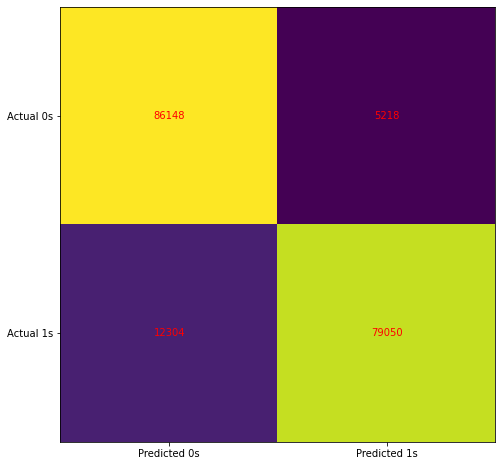

In [ ]:
cm = confusion_matrix(y_test, lgr_predict)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
auc = roc_auc_score(y_test, lgr_predict)
print('AUC: %.3f' % auc)

AUC: 0.904


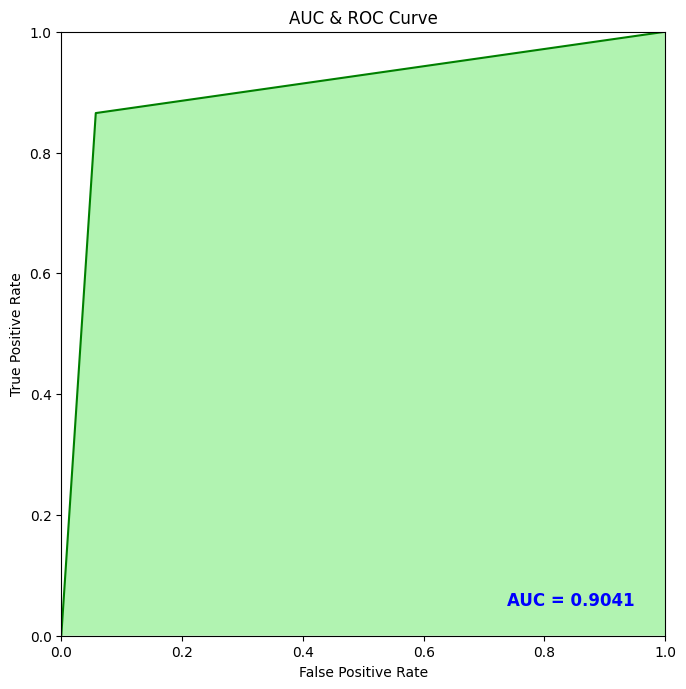

In [ ]:
false_positive_rate, true_positive_rate, thresolds = roc_curve(y_test, lgr_predict)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Feature: ip encoded, Score: 6.4190024647518475
Feature: app encoded, Score: 4.685700913170679
Feature: device encoded, Score: 0.8844742771327117
Feature: os encoded, Score: 0.5737112997270695
Feature: channel encoded, Score: 2.088636521086708
Feature: time encoded, Score: 1.7363266396485608


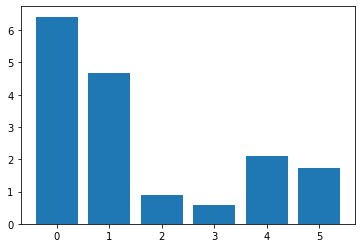

In [ ]:
importance = logreg.coef_[0]

for i,v in enumerate(importance):
	print(f'Feature: {x_train.columns[i]}, Score: {v}')
 
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
train_most_effective = x_train.iloc[:, :2]
test_most_effectiv = x_train.iloc[:, :2]

In [ ]:
logreg = LogisticRegression()
logreg.fit(train_most_effective, y_train)

LogisticRegression()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


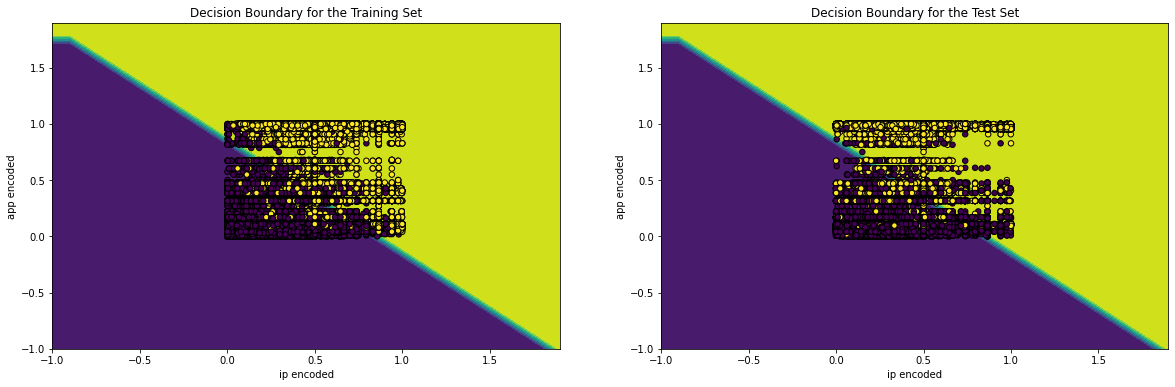

In [ ]:
x_min, x_max = x_train['ip encoded'].min() - 1, x_train['ip encoded'].max() + 1
y_min, y_max = x_train['app encoded'].min() - 1, x_train['app encoded'].max() + 1

xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                 np.arange(y_min, y_max, 0.1))

Z_train = logreg.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)


x_min, x_max = x_test['ip encoded'].min() - 1, x_test['ip encoded'].max() + 1
y_min, y_max = x_test['app encoded'].min() - 1, x_test['app encoded'].max() + 1

xx_test, yy_test = np.meshgrid(np.arange(x_min, x_max, 0.1),
                               np.arange(y_min, y_max, 0.1))

Z_test = logreg.predict(np.c_[xx_test.ravel(), yy_test.ravel()])
Z_test = Z_test.reshape(xx_test.shape)



plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.contourf(xx_train, yy_train, Z_train)
plt.scatter(x_train['ip encoded'], x_train['app encoded'], c = y_train, s = 30, edgecolor = 'k')
plt.xlabel('ip encoded')
plt.ylabel('app encoded')
plt.title('Decision Boundary for the Training Set')
plt.subplot(1, 2, 2)
plt.contourf(xx_test, yy_test, Z_test)
plt.scatter(x_test['ip encoded'], x_test['app encoded'], c = y_test, s = 30, edgecolor = 'k')
plt.xlabel('ip encoded')
plt.ylabel('app encoded')
plt.title('Decision Boundary for the Test Set')
plt.show()

In [ ]:
print(classification_report(y_test, lgr_predict))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     91366
           1       0.94      0.87      0.90     91354

    accuracy                           0.90    182720
   macro avg       0.91      0.90      0.90    182720
weighted avg       0.91      0.90      0.90    182720



**SVM**

In [ ]:
svm_data = train[train.is_attributed == 1].sample(5000)
svm_data = svm_data.append(train[train.is_attributed == 0].sample(5000))
svm_data = shuffle(svm_data)

In [ ]:
svm_y = svm_data['is_attributed']
svm_x = svm_data.drop(columns='is_attributed')

In [ ]:
svm_cls = svm.SVC()
svm_cls.fit(svm_x, svm_y)

SVC()

In [ ]:
svm_predict = svm_cls.predict(x_test)

In [ ]:
svm_cls.score(x_test, y_test)

0.9088933887915936

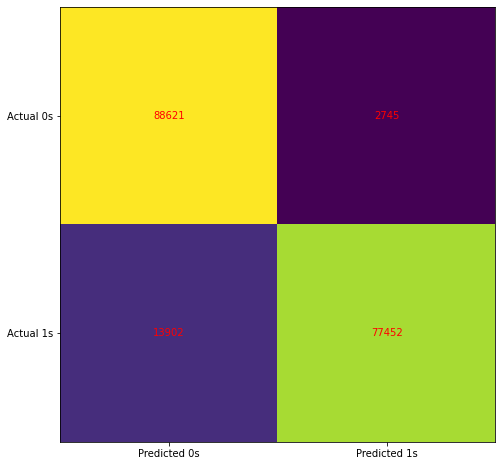

In [ ]:
cm = confusion_matrix(y_test, svm_predict)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
auc = roc_auc_score(y_test, svm_predict)
print('AUC: %.3f' % auc)

AUC: 0.909


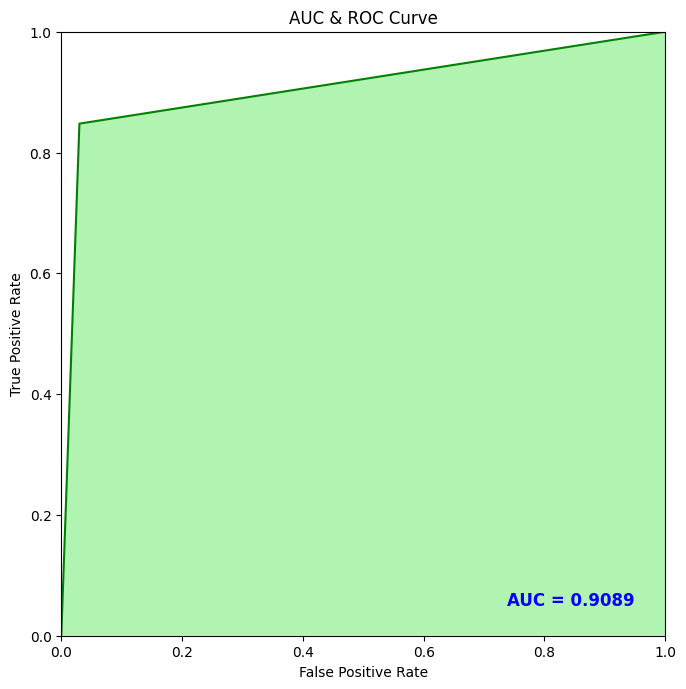

In [ ]:
false_positive_rate, true_positive_rate, thresolds = roc_curve(y_test, svm_predict)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
print(classification_report(y_test, svm_predict))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     91366
           1       0.97      0.85      0.90     91354

    accuracy                           0.91    182720
   macro avg       0.92      0.91      0.91    182720
weighted avg       0.92      0.91      0.91    182720



**KNN**

In [ ]:
knn_cls = KNeighborsClassifier(n_neighbors=5)
knn_cls.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_predict = knn_cls.predict(x_test)

In [ ]:
knn_cls.score(x_test, y_test)

0.9069341068301225

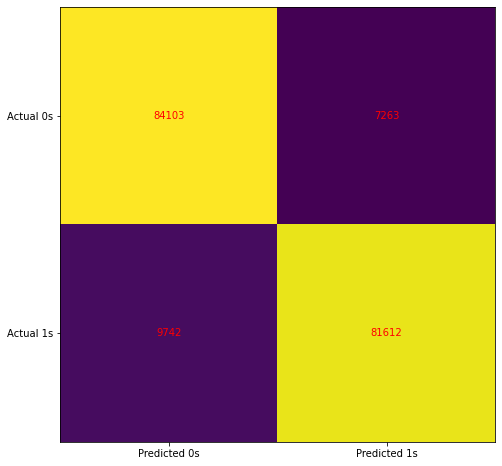

In [ ]:
cm = confusion_matrix(y_test, knn_predict)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
auc = roc_auc_score(y_test, knn_predict)
print('AUC: %.3f' % auc)

AUC: 0.907


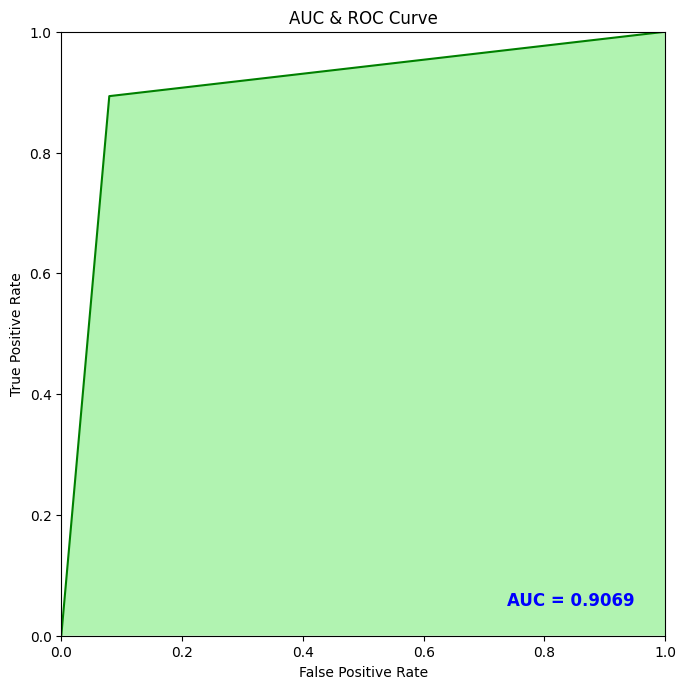

In [ ]:
false_positive_rate, true_positive_rate, thresolds = roc_curve(y_test, knn_predict)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     91366
           1       0.92      0.89      0.91     91354

    accuracy                           0.91    182720
   macro avg       0.91      0.91      0.91    182720
weighted avg       0.91      0.91      0.91    182720



**Decision Tree**

In [ ]:
d_tree = tree.DecisionTreeClassifier()
d_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
d_tree_predict = d_tree.predict(x_test)

In [ ]:
d_tree.score(x_test, y_test)

0.8838879159369527

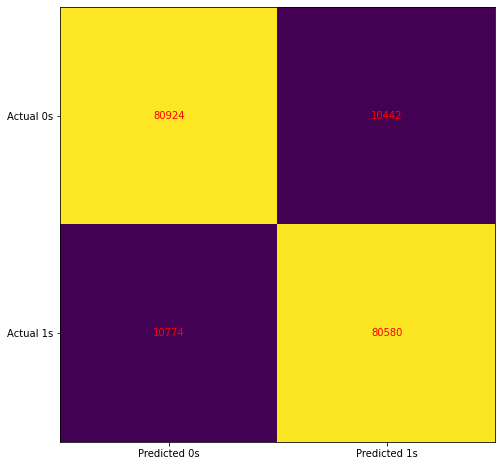

In [ ]:
cm = confusion_matrix(y_test, d_tree_predict)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
auc = roc_auc_score(y_test, d_tree_predict)
print('AUC: %.3f' % auc)

AUC: 0.884


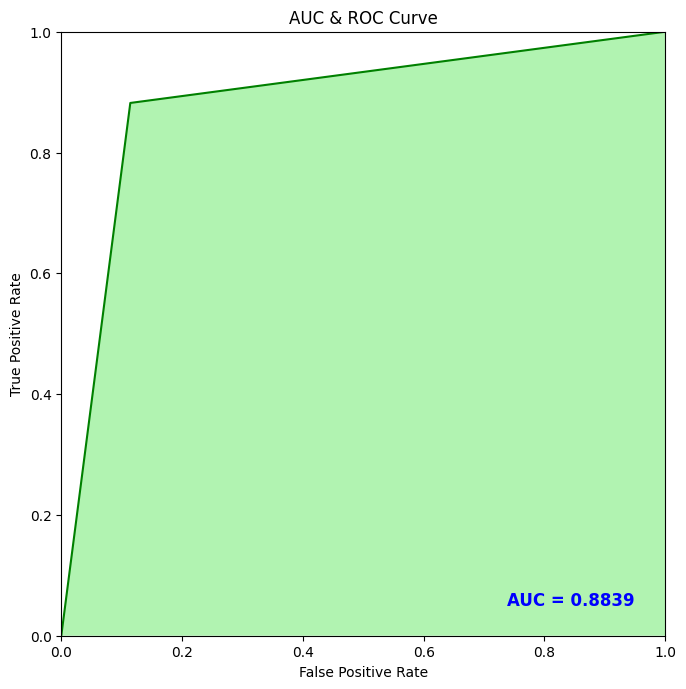

In [ ]:
false_positive_rate, true_positive_rate, thresolds = roc_curve(y_test, d_tree_predict)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
print(classification_report(y_test, d_tree_predict))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88     91366
           1       0.89      0.88      0.88     91354

    accuracy                           0.88    182720
   macro avg       0.88      0.88      0.88    182720
weighted avg       0.88      0.88      0.88    182720



**Random forest**

In [ ]:
forest_cls = RandomForestClassifier(max_depth=2, random_state=0)
forest_cls.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
forest_predict = forest_cls.predict(x_test)

In [ ]:
forest_cls.score(x_test, y_test)

0.9110551663747811

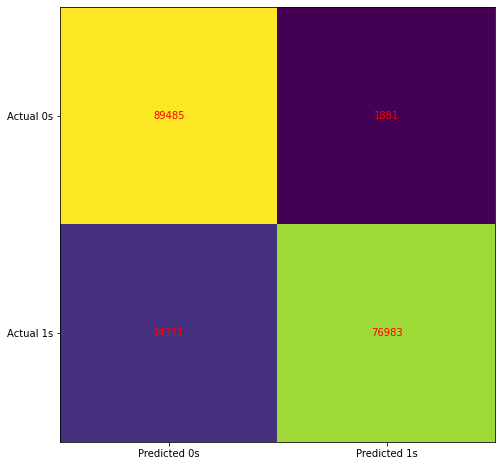

In [ ]:
cm = confusion_matrix(y_test, forest_predict)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
auc = roc_auc_score(y_test, forest_predict)
print('AUC: %.3f' % auc)

AUC: 0.911


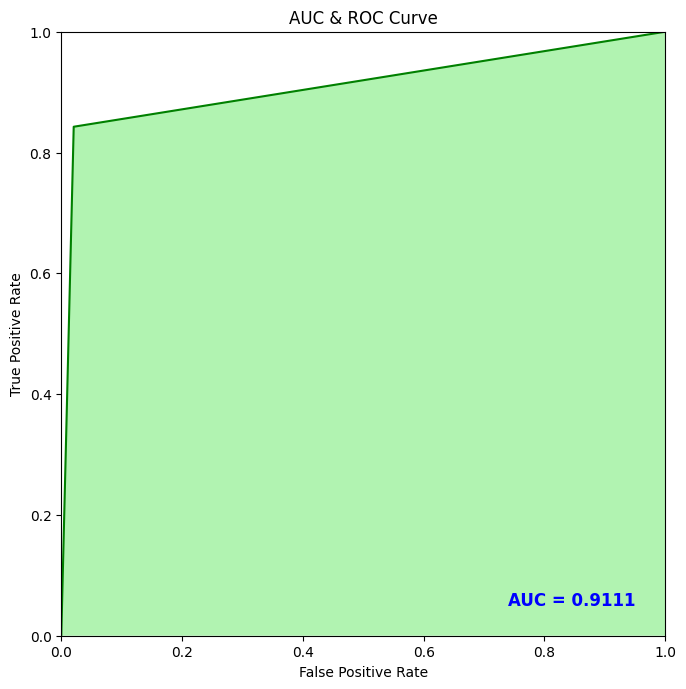

In [ ]:
false_positive_rate, true_positive_rate, thresolds = roc_curve(y_test, forest_predict)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
print(classification_report(y_test, forest_predict))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     91366
           1       0.98      0.84      0.90     91354

    accuracy                           0.91    182720
   macro avg       0.92      0.91      0.91    182720
weighted avg       0.92      0.91      0.91    182720



**Naive Bayes**

In [ ]:
naive_cls = GaussianNB()
naive_cls.fit(x_train, y_train)

GaussianNB()

In [ ]:
naive_predict = naive_cls.predict(x_test)

In [ ]:
naive_cls.score(x_test, y_test)

0.9010945709281961

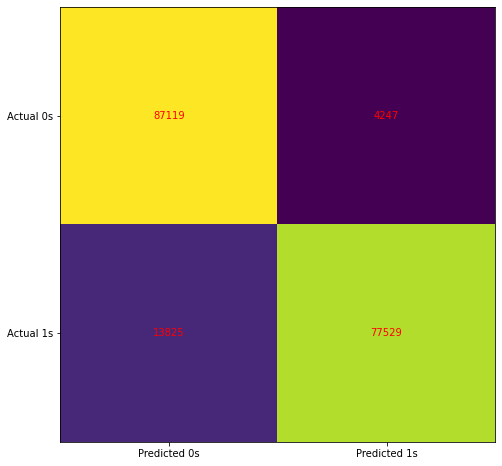

In [ ]:
cm = confusion_matrix(y_test, naive_predict)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
auc = roc_auc_score(y_test, naive_predict)
print('AUC: %.3f' % auc)

AUC: 0.901


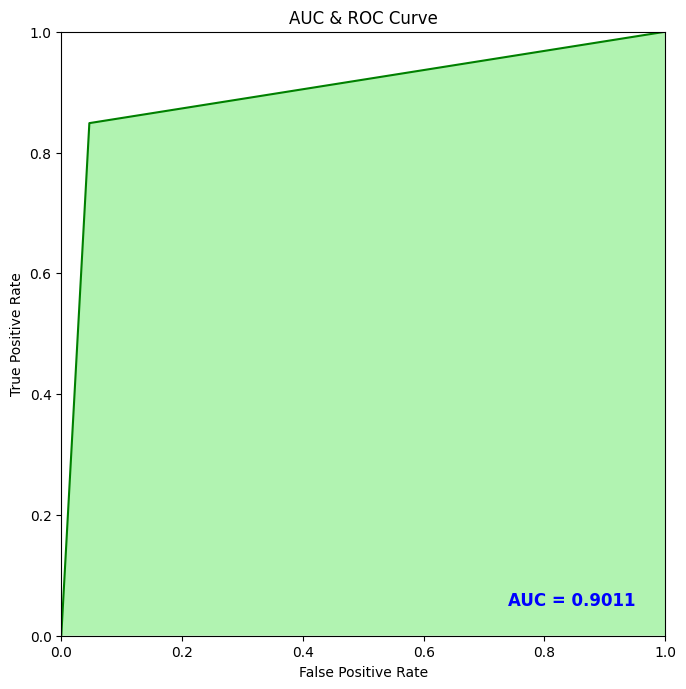

In [ ]:
false_positive_rate, true_positive_rate, thresolds = roc_curve(y_test, naive_predict)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
print(classification_report(y_test, naive_predict))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91     91366
           1       0.95      0.85      0.90     91354

    accuracy                           0.90    182720
   macro avg       0.91      0.90      0.90    182720
weighted avg       0.91      0.90      0.90    182720

